In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tf_data
import matplotlib.pyplot as plt
tf_data.disable_progress_bar()

In [ ]:
embedding_layers = layers.Embedding(100, 5)
result = embedding_layers(tf.constant([1, 2, 3]))
result.numpy()

array([[ 0.02193327,  0.00177271, -0.0180703 ,  0.00359093,  0.00974892],
       [ 0.00775018,  0.00311976, -0.02428354, -0.02471091,  0.04059071],
       [-0.00952543, -0.00058565,  0.00099824, -0.01766013, -0.01673805]],
      dtype=float32)

In [ ]:
result = embedding_layers(tf.constant([[0, 1, 2], [3, 4, 5]]))
result.shape

TensorShape([2, 3, 5])

In [ ]:
from tensorflow.python.ops.control_flow_ops import with_dependencies
(train_data, test_data), info = tf_data.load('imdb_reviews/subwords8k', split=(tf_data.Split.TRAIN, tf_data.Split.TEST), with_info=True, as_supervised=True)
(train_data, test_data)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteTYXFFC/imdb_reviews-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteTYXFFC/imdb_reviews-test.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteTYXFFC/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


(<PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>)

In [ ]:
encoder = info.features['text'].encoder
encoder.subwords[:10]

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br']

In [ ]:
padded_shapes = ([None], ())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)

In [ ]:
train_batch, train_label = next(iter(train_batches))
train_batch.numpy()

array([[ 373,  728,   23, ...,    0,    0,    0],
       [6111, 7541,   47, ...,    0,    0,    0],
       [  12,  270,   13, ...,    0,    0,    0],
       ...,
       [ 884, 2142, 4488, ...,    0,    0,    0],
       [ 977,   12,  174, ...,  208, 2564, 7975],
       [ 809,  110,  121, ...,    0,    0,    0]])

In [ ]:
embedding_dim = 16

# Build neural network
model = keras.Sequential()
model.add(layers.Embedding(encoder.vocab_size, embedding_dim))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          130960    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(train_batches,epochs=10, validation_data=test_batches, validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 15s 5ms/step - loss: 0.5098 - accuracy: 0.6921 - val_loss: 0.3215 - val_accuracy: 0.8700
Epoch 2/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2866 - accuracy: 0.8833 - val_loss: 0.3846 - val_accuracy: 0.8500
Epoch 3/10
2500/2500 [==============================] - 14s 5ms/step - loss: 0.2324 - accuracy: 0.9111 - val_loss: 0.3931 - val_accuracy: 0.8350
Epoch 4/10
2500/2500 [==============================] - 20s 8ms/step - loss: 0.1996 - accuracy: 0.9238 - val_loss: 0.4087 - val_accuracy: 0.8650
Epoch 5/10
2500/2500 [==============================] - 19s 8ms/step - loss: 0.1805 - accuracy: 0.9320 - val_loss: 0.4885 - val_accuracy: 0.8200
Epoch 6/10
2500/2500 [==============================] - 14s 5ms/step - loss: 0.1617 - accuracy: 0.9397 - val_loss: 0.4019 - val_accuracy: 0.8850
Epoch 7/10
2500/2500 [==============================] - 14s 6ms/step - loss: 0.1466 - accuracy: 0.9449 - val_loss: 0.3759 - val_ac

In [ ]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)

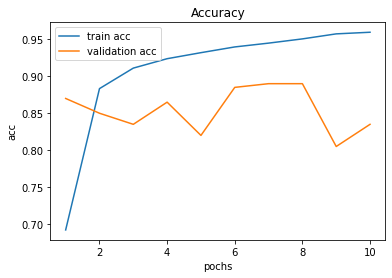

In [ ]:
plt.plot(epochs, acc, label='train acc')
plt.plot(epochs, val_acc, label='validation acc')
plt.title('Accuracy')
plt.xlabel('pochs')
plt.ylabel('acc')
plt.legend()

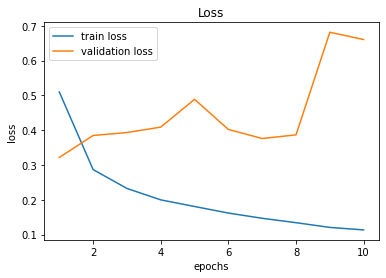

In [ ]:
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()